In [57]:
'''
ECSE 556 Homework 1
Dimensionality Reduction
Gian Favero
October 6th, 2023
'''

# Common imports
import numpy as np
import matplotlib.pyplot as plt
import time

# import data
data = np.genfromtxt('Data/gdsc_expr_postCB.csv', delimiter=',')
data = data[1:,1:]
data = np.transpose(data)

# Dimensionality Reduction

Principal Component Analysis (PCA)

In [58]:
from sklearn.decomposition import PCA

# Create PCA object
pca = PCA(n_components=2)

# Fit and tranform data
pca_start = time.time()
data_pca = pca.fit_transform(data)
pca_end = time.time()

UMAP

In [59]:
import umap

# Create UMAP object
u_map = umap.UMAP(n_components=2)

# UMAP reduction of data
umap_start = time.time()
data_umap = u_map.fit_transform(data)
umap_end = time.time()

c:\Users\gmari\Documents\Repos\ECSE556\venv\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\gmari\Documents\Repos\ECSE556\venv\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\gmari\Documents\Repos\ECSE556\venv\lib\site-packages\umap\distanc

t-SNE

In [60]:
from sklearn.manifold import TSNE

# Generate TSNE object
tsne = TSNE(n_components=2)

# Fit and transform data
tsne_start = time.time()
data_tsne = tsne.fit_transform(data)
tsne_end = time.time()

Comparison (Default Params)

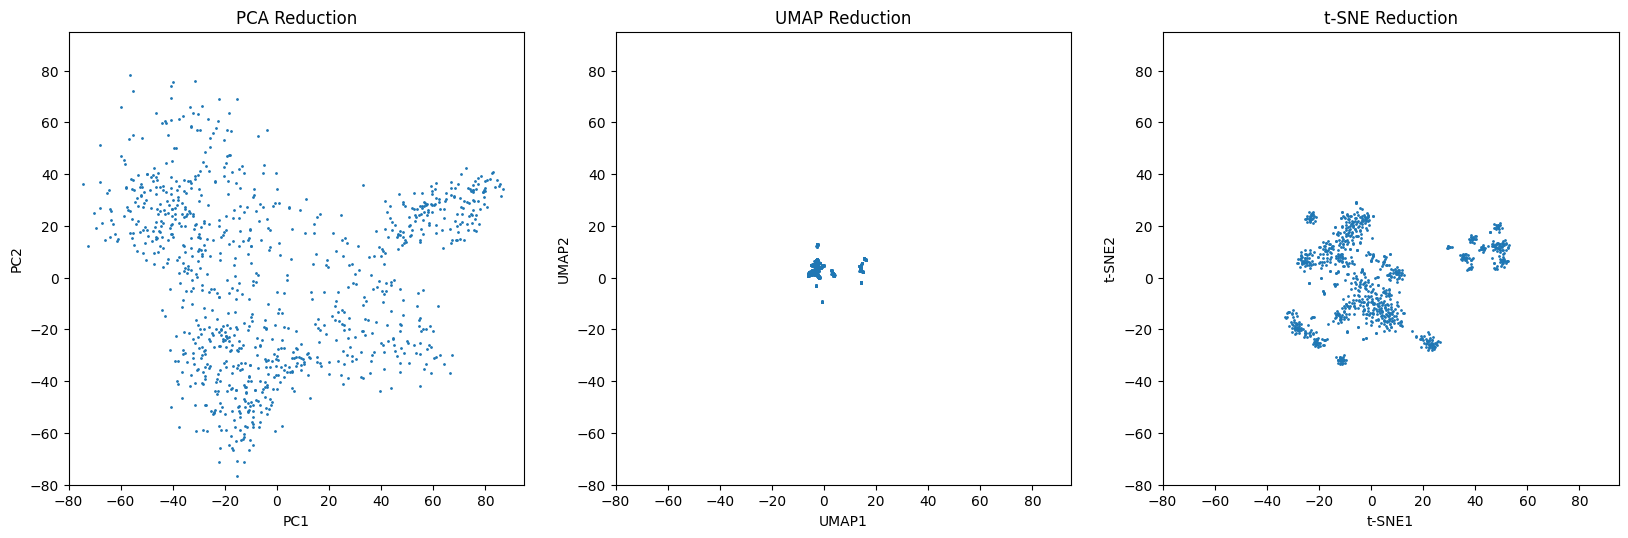

+-----------------------------+
|     Run Time Comparison     |
+--------+--------------------+
| Method |    Run Time (s)    |
+--------+--------------------+
|  PCA   | 0.6406724452972412 |
|  UMAP  | 10.629022121429443 |
|  TSNE  | 5.347977876663208  |
+--------+--------------------+


In [61]:
# Plotting
plt.figure(figsize=(20,20))
plt.subplot(331)
plt.scatter(data_pca[:,0], data_pca[:,1], s=1)
plt.xlim(-80, 95)
plt.ylim(-80, 95)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Reduction')

plt.subplot(332)
plt.scatter(data_umap[:,0], data_umap[:,1], s=1)
plt.xlim(-80, 95)
plt.ylim(-80, 95)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP Reduction')

plt.subplot(333)
plt.scatter(data_tsne[:,0], data_tsne[:,1], s=1)
plt.xlim(-80, 95)
plt.ylim(-80, 95)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE Reduction')
plt.show()

# Run time comparison
import prettytable as pt

t = pt.PrettyTable(['Method', 'Run Time (s)'])
t.add_row(['PCA', pca_end - pca_start])
t.add_row(['UMAP', umap_end - umap_start])
t.add_row(['TSNE', tsne_end - tsne_start])
t.title = 'Run Time Comparison'
print(t)

UMAP Analysis

In [62]:
# Changing number of neighbours
neighbours = [5, 20, 150]
umaps = []
for n in neighbours:
    u_map = umap.UMAP(n_components=2, n_neighbors=n)
    umaps.append(u_map.fit_transform(data))

# Changing min distance
min_dist = [0.1, 0.5, 0.9]
for m in min_dist:
    u_map = umap.UMAP(n_components=2, min_dist=m)
    umaps.append(u_map.fit_transform(data))

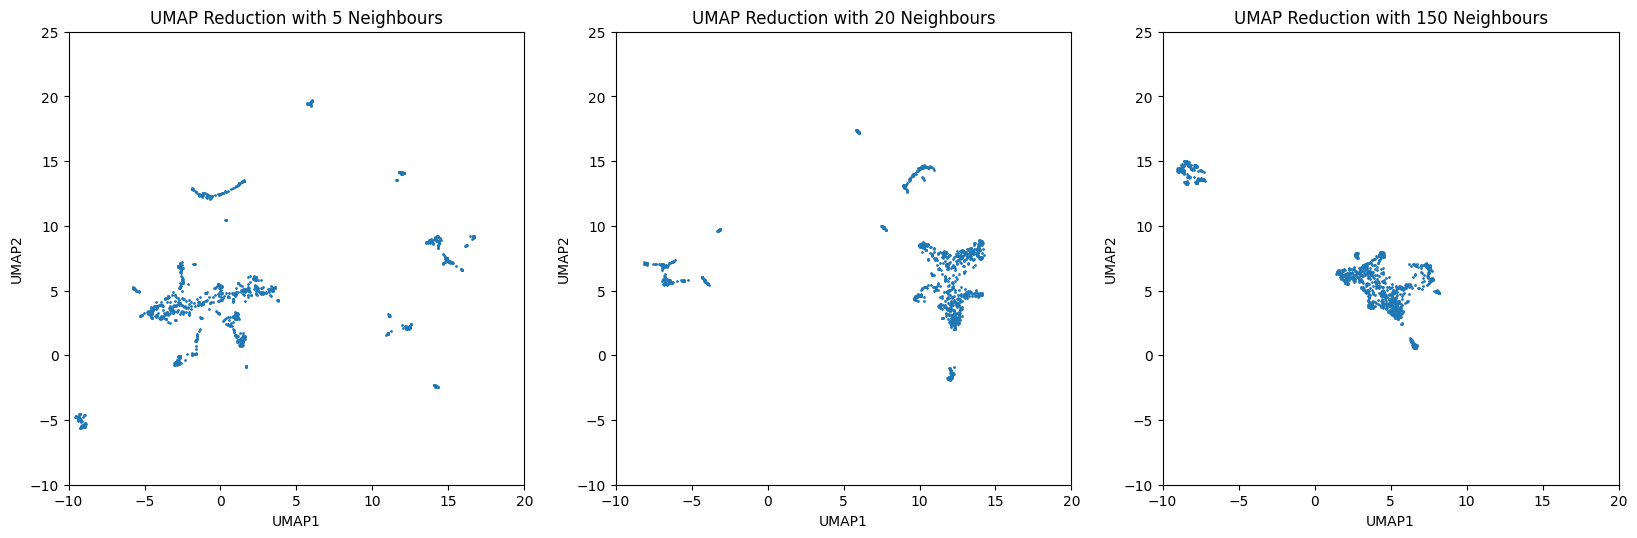

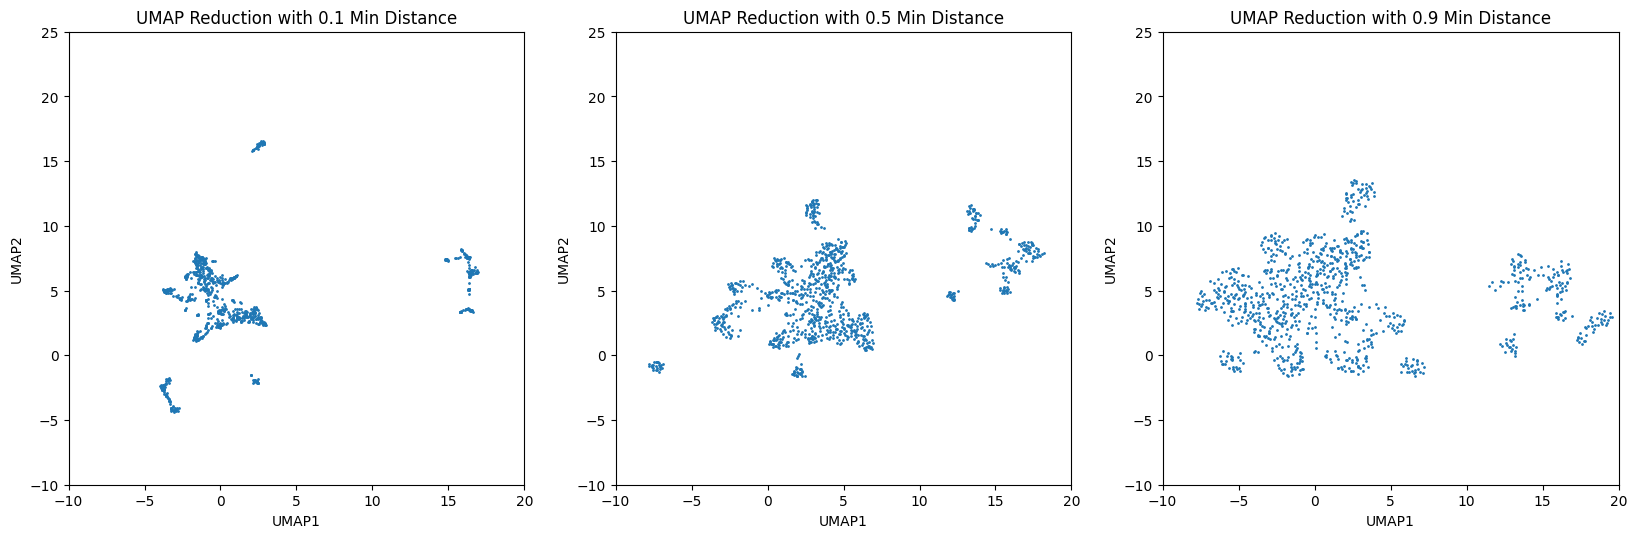

In [63]:
# Plotting UMAPs
plt.figure(figsize=(20,20))
for i in range(3):
    plt.subplot(331+i)
    plt.xlim(-10, 20)
    plt.ylim(-10, 25)
    plt.scatter(umaps[i][:,0], umaps[i][:,1], s=1)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.title(f'UMAP Reduction with {neighbours[i]} Neighbours')
plt.show()

plt.figure(figsize=(20,20))
for i in [3, 4, 5]:
    plt.subplot(331+i)
    plt.xlim(-10, 20)
    plt.ylim(-10, 25)
    plt.scatter(umaps[i][:,0], umaps[i][:,1], s=1)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.title(f'UMAP Reduction with {min_dist[i % 3]} Min Distance')
plt.show()

t-SNE Analysis

In [64]:
# Changing perplexity
perplexities = [5, 50, 150]
tsnes = []
for p in perplexities:
    tsne = TSNE(n_components=2, perplexity=p)
    tsnes.append(tsne.fit_transform(data))

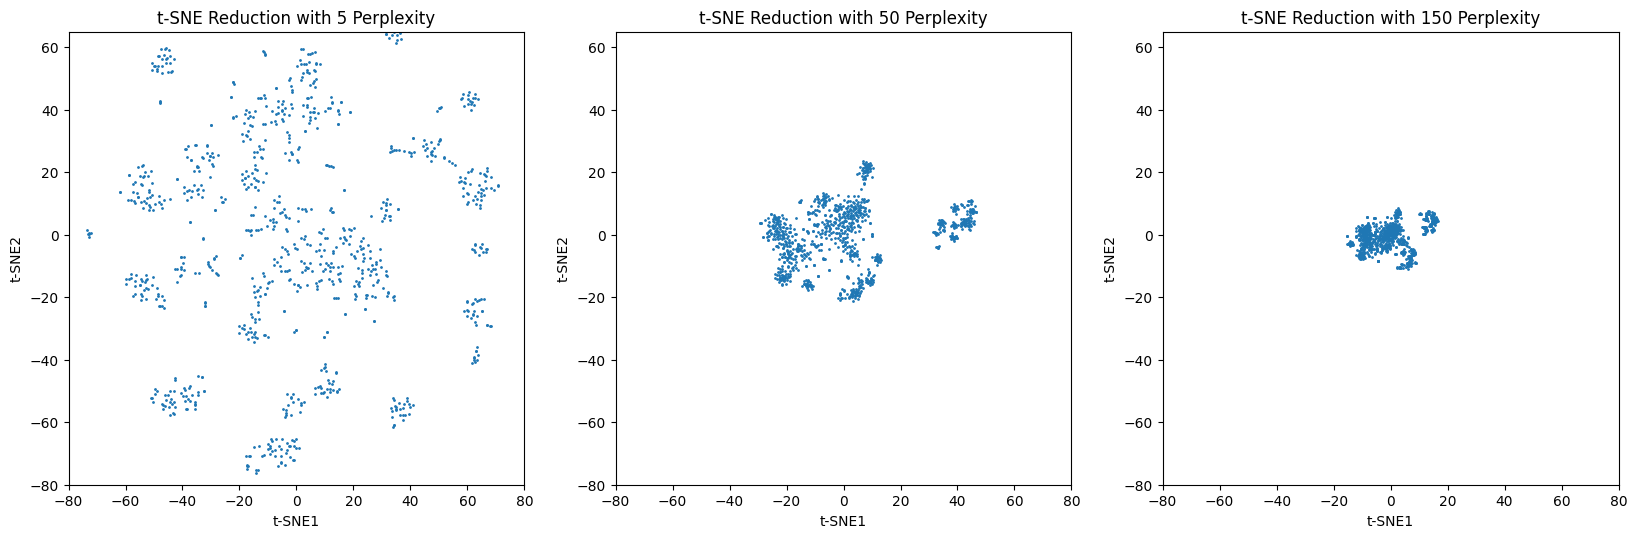

In [65]:
# Plotting TSNEs
plt.figure(figsize=(20,20))
for i in range(3):
    plt.subplot(331+i)
    plt.xlim(-80, 80)
    plt.ylim(-80, 65)
    plt.scatter(tsnes[i][:,0], tsnes[i][:,1], s=1)
    plt.xlabel('t-SNE1')
    plt.ylabel('t-SNE2')
    plt.title('t-SNE Reduction with {} Perplexity'.format(perplexities[i]))
plt.show()

# Clustering

Agglomerative Clustering

In [81]:
from sklearn.cluster import AgglomerativeClustering

# Construct the clustering object
agglomerative_clustering = AgglomerativeClustering(n_clusters=3)

# Fit the data
agglomerative_clustering.fit(data)

# Get the labels
agglo_labels = agglomerative_clustering.labels_

K-Means Clustering

In [86]:
from sklearn.cluster import KMeans

# Construct the clustering object
k_means = KMeans(n_clusters=3)

# Fit the data
k_means.fit(data)

# Get the labels and cluster centers
k_cluster_centers = k_means.cluster_centers_
k_labels = k_means.labels_

c:\Users\gmari\Documents\Repos\ECSE556\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Similarities

In [87]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import rand_score
from sklearn.metrics import adjusted_rand_score

# Jaccard score for each pair of clusters
jaccards = []
for i in range(3):
    for j in range(3):
        jaccards.append(jaccard_score(agglo_labels == i, k_labels == j).round(3))

# Make table of jaccard scores
default_t = pt.PrettyTable()
default_t.field_names = ['', 'Cluster 1', 'Cluster 2', 'Cluster 3']
default_t.title = 'Jaccard Score for Each Pair of Clusters (Default)'

for i in range(3):
    default_t.add_row([f'Cluster {i+1}', jaccards[i], jaccards[i+3], jaccards[i+6]])

print(default_t)

# Rand score for agglomerative and k-means clustering
def_rand = rand_score(agglo_labels, k_labels)
print("Rand Score: ", def_rand)

# Adjusted rand score for agglomerative and k-means clustering
def_adj_rand = adjusted_rand_score(agglo_labels, k_labels)
print("Adjusted Rand Score: ", def_adj_rand)


+---------------------------------------------------+
| Jaccard Score for Each Pair of Clusters (Default) |
+------------+------------+------------+------------+
|            | Cluster 1  | Cluster 2  | Cluster 3  |
+------------+------------+------------+------------+
| Cluster 1  |   0.019    |    0.0     |   0.858    |
| Cluster 2  |   0.888    |    0.0     |   0.049    |
| Cluster 3  |    0.0     |    1.0     |    0.0     |
+------------+------------+------------+------------+
Rand Score:  0.9147245530370918
Adjusted Rand Score:  0.8185407833795102


#### Analysis of Agglomerative Clustering

Euclidean Affinity for Agglomerative Clustering

In [88]:
# Eucledian distance
euc_agglo = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='euclidean')
euc_agglo.fit(data)
euc_labels = euc_agglo.labels_

# Jaccard score for each pair of clusters
euc_jaccards = []
for i in range(3):
    for j in range(3):
        euc_jaccards.append(jaccard_score(euc_labels == i, k_labels == j).round(3))

# Make table of jaccard scores
euc_t = pt.PrettyTable()
euc_t.field_names = ['', 'Cluster 1', 'Cluster 2', 'Cluster 3']
euc_t.title = 'Jaccard Score for Each Pair of Clusters (Agglomerative + Euclidean)'

for i in range(3):
    euc_t.add_row([f'Cluster {i+1}', euc_jaccards[i], euc_jaccards[i+3], euc_jaccards[i+6]])

print(euc_t)

# Rand score
euc_rand = rand_score(euc_labels, k_labels)
print("Rand Score: ", euc_rand)

# Adjusted rand score
euc_adj_rand = adjusted_rand_score(euc_labels, k_labels)
print("Adjusted Rand Score: ", euc_adj_rand)

c:\Users\gmari\Documents\Repos\ECSE556\venv\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


+---------------------------------------------------------------------+
| Jaccard Score for Each Pair of Clusters (Agglomerative + Euclidean) |
+----------------+----------------+----------------+------------------+
|                |   Cluster 1    |   Cluster 2    |    Cluster 3     |
+----------------+----------------+----------------+------------------+
|   Cluster 1    |     0.343      |      0.0       |      0.018       |
|   Cluster 2    |     0.481      |     0.002      |       0.0        |
|   Cluster 3    |     0.174      |      0.0       |       0.0        |
+----------------+----------------+----------------+------------------+
Rand Score:  0.3838606649663381
Adjusted Rand Score:  0.000743384580359699


Cosine Affinity for Agglomerative Clustering

In [89]:
# Cosine distance
cos_agglo = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='cosine')
cos_agglo.fit(data)
cos_labels = cos_agglo.labels_

# Jaccard score for each pair of clusters
cos_jaccards = []
for i in range(3):
    for j in range(3):
        cos_jaccards.append(jaccard_score(cos_labels == i, k_labels == j).round(3))

# Make table of jaccard scores
t = pt.PrettyTable()
t.field_names = ['', 'Cluster 1', 'Cluster 2', 'Cluster 3']
t.title = 'Jaccard Score for Each Pair of Clusters (Agglomerative + Cosine)'

for i in range(3):
    t.add_row([f'Cluster {i+1}', cos_jaccards[i], cos_jaccards[i+3], cos_jaccards[i+6]])

print(t)

# Rand score
cos_rand = rand_score(cos_labels, k_labels)
print("Rand Score: ", cos_rand)

# Adjusted rand score
cos_adj_rand = adjusted_rand_score(cos_labels, k_labels)
print("Adjusted Rand Score: ", cos_adj_rand)

c:\Users\gmari\Documents\Repos\ECSE556\venv\lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


+------------------------------------------------------------------+
| Jaccard Score for Each Pair of Clusters (Agglomerative + Cosine) |
+---------------+---------------+---------------+------------------+
|               |   Cluster 1   |   Cluster 2   |    Cluster 3     |
+---------------+---------------+---------------+------------------+
|   Cluster 1   |     0.343     |      0.0      |      0.018       |
|   Cluster 2   |     0.481     |     0.002     |       0.0        |
|   Cluster 3   |     0.174     |      0.0      |       0.0        |
+---------------+---------------+---------------+------------------+
Rand Score:  0.3838606649663381
Adjusted Rand Score:  0.000743384580359699


# Regression